In [13]:
def print_side_by_side(data, label = None):
    returns = data.get("returns", {})
    model = data.get("model", {})
    
    # Cabeçalhos
    if label != None:
        string = f"( {label} )\n\n"
    string += f"{'METRIC'.ljust(30)}" + "".join([f"{key.upper().ljust(20)}" for key in returns.keys()]) + "\n"
    string += "-" * 90 + "\n"

    # Métricas do Returns
    if returns:
        for metric in next(iter(returns.values())).keys():
            metric_name = metric.replace("average_", "").replace("_", " ").capitalize()
            line = f"{metric_name.ljust(30)}"
            for key in returns.keys():
                value = returns[key].get(metric, "")
                line += f"{value:,.2f}".ljust(20)
            string += line + "\n"

    string += "\n" + f"{'MODEL METRIC'.ljust(30)}" + "".join([f"{key.upper().ljust(20)}" for key in model.keys()]) + "\n"
    string += "-" * 90 + "\n"

    # Métricas do Model
    if model:
        for metric in next(iter(model.values())).keys():
            if metric == "confusion_matrix":
                string += f"{'Confusion Matrix'.ljust(30)}"
                for key in model.keys():
                    matrix = model[key].get(metric, [[]])
                    string += f"{str(matrix[0]).ljust(20)}"
                string += "\n" + " " * 30  # Alinha a segunda linha da matriz
                for key in model.keys():
                    matrix = model[key].get(metric, [[]])
                    string += f"{str(matrix[1]).ljust(20)}"
                string += "\n"
            else:
                metric_name = metric.replace("_", " ").capitalize()
                line = f"{metric_name.ljust(30)}"
                for key in model.keys():
                    value = model[key].get(metric, "")
                    line += f"{value:.4f}".ljust(20)
                string += line + "\n"

    print(string)

In [14]:
# Criação de features

import requests

# Baixar o script do repositório
response = requests.get('https://raw.githubusercontent.com/rianlucascs/predicao-dados-binarios/master/api.py')

# Executar o código do script
exec(response.text, globals())

In [15]:
from pandas import concat

# Constantes Matemáticas
PI = 3.14159265358979323846 # Número de Pi
EULER = 2.718281828459045  # Número de Euler
GOLDEN_RATIO = 1.618033988749895  # Razão áurea
LN2 = 0.6931471805599453  # Logaritmo natural de 2
LN10 = 2.302585092994046  # Logaritmo natural de 10
SQRT2 = 1.4142135623730951  # Raiz quadrada de 2
CATALAN = 0.915965594177219  # Constante de Catalan
EULER_MASCHERONI = 0.57721566490153286060  # Constante de Euler-Mascheroni

# Constantes Estatísticas
Z95 = 1.96  # Valor crítico da distribuição normal para 95% de confiança
Z99 = 2.576  # Valor crítico da distribuição normal para 99% de confiança

# Constantes Físicas
LIGHT_SPEED = 299792.458  # Velocidade da luz em km/s
GRAVITY = 9.80665  # Aceleração da gravidade em m/s^2
BOLTZMANN = 1.380649e-23  # Constante de Boltzmann em J/K
AVOGADRO = 6.02214076e23  # Número de Avogadro

# Constantes Financeiras
TRADING_DAYS_YEAR = 252  # Número típico de dias úteis de negociação em um ano
RISK_FREE_RATE = 0.03  # Taxa livre de risco padrão (exemplo, ajustável)
INFLATION_RATE = 0.02  # Taxa de inflação padrão (exemplo, ajustável)

# Constantes Geográficas
EARTH_RADIUS_KM = 6371  # Raio da Terra em km
EARTH_RADIUS_MI = 3958.8  # Raio da Terra em milhas
DEG_TO_RAD = PI / 180  # Conversão de graus para radianos
RAD_TO_DEG = 180 / PI  # Conversão de radianos para graus
DISTANCE_TERRA_LUA = 384400  # Distância média Terra-Lua em km
DISTANCE_TERRA_SOL = 149600000  # Distância média Terra-Sol em km

# Constantes de Tempo
SECONDS_IN_MINUTE = 60
SECONDS_IN_HOUR = 3600
SECONDS_IN_DAY = 86400
DAYS_IN_YEAR = 365  # Ou 366 para anos bissextos
MONTHS_IN_YEAR = 12

# Constantes relacionadas à Lua
LUNAR_ORBITAL_PERIOD = 27.3  # Período orbital da Lua (em dias)
LUNAR_SYNODIC_PERIOD = 29.53  # Ciclo sinódico (em dias)
LUNAR_ROTATION_PERIOD = 27.3  # Período de rotação da Lua (em dias)
MOON_DISTANCE_AVG_KM = 384400  # Distância média da Lua à Terra (em km)
MOON_DIAMETER_KM = 3474  # Diâmetro médio da Lua (em km)
MOON_RADIUS_KM = MOON_DIAMETER_KM / 2  # Raio da Lua (em km)
LUNAR_PHASE_DURATION = 29.53 / 4  # Duração de uma fase (em dias)
LUNAR_PRECESSION_PERIOD = 18.6 * 365.25  # Período de precessão lunar (em dias)

# Estatísticas básicas
Q = lambda x, window_size=5: x.rolling(window_size).std()
W = lambda x, window_size=5: x.rolling(window_size).sum()
E = lambda x, window_size=5: x.rolling(window_size).mean()
R = lambda x, window_size=5: x.rolling(window_size).median()
T = lambda x, window_size=5: x.rolling(window_size).max()
Y = lambda x, window_size=5: x.rolling(window_size).min()

# Diferenças e transformações
U = lambda x: x.diff().diff()  # Segunda diferença
I = lambda x: x.diff()          # Primeira diferença
O = lambda x: x - x.shift(1)
P = lambda x: x * x.shift(1) * x.shift(2)

# Métricas estatísticas
A = lambda x, window_size=5: x.rolling(window_size).apply(lambda z: abs(z - z.mean()).mean())  # Mean Absolute Deviation
S = lambda x, window_size=5: x.rolling(window_size).std() / x.rolling(window_size).mean()  # Coeficiente de variação
D = lambda x, window_size=5: x.rolling(window_size).skew()  # Assimetria
F = lambda x, window_size=5: x.rolling(window_size).kurt()  # Curtose

# Retornos e volatilidade
G = lambda x, window_size=5: (x - x.shift(window_size)) / x.shift(window_size)
H = lambda x, window_size=5: x.rolling(window_size).apply(lambda z: sum(z**2))

# Quantis e IQR
J = lambda x, window_size=5, quantile=0.5: x.rolling(window_size).quantile(quantile)
K = lambda x, window_size=5: x.rolling(window_size).quantile(0.75) - x.rolling(window_size).quantile(0.25)

# Harmônica e geométrica
L = lambda x, window_size=5: x.rolling(window_size).apply(lambda z: len(z) / sum(1.0 / z))
Z = lambda x, window_size=5: x.rolling(window_size).apply(lambda z: (z.prod())**(1.0 / len(z)))

# Métricas financeiras
X = lambda x, volume, window_size=5: (x * volume).rolling(window_size).sum() / volume.rolling(window_size).sum()
C = lambda x, y, window_size=5: x.rolling(window_size).corr(y)

# Índice de Força Relativa (RSI)
V = lambda x, window_size=14: (
    100 - (100 / (1 + x.diff().clip(lower=0).rolling(window_size).mean() /
                  x.diff().clip(upper=0).abs().rolling(window_size).mean()))
)

# Cálculo de Covariância
B = lambda x, y, window_size=5: x.rolling(window_size).cov(y)

In [16]:
def __3__(df):
    # NOTE: ticker = BBDC4, start = '2012-05-11', end = '2022-05-11', p = 1
    volume = df['Volume']                                             
    adj_close = df['Adj Close'].pct_change(1) 
    low = df['Low'].pct_change(1)        
    high = df['High'].pct_change(1)   
    q = W(S(J(low, 6, 0.10) - J(high, 6, 0.10), 6), 6)
    w = volume / EARTH_RADIUS_KM / A(volume, 6) * W(U(high), 11)
    r = W(q, 4) / J(U(adj_close), 5, 0.75) 
    t = W(w, 16) / J(U(adj_close), 11, 0.75) 
    u = U(r) - W(U(t) * U(r), 15)
    return u   

In [17]:
def __3__(self):
    # NOTE: ticker = BBDC4, start = '2012-05-11', end = '2022-05-11', p = 1
    W = lambda x, window_size=5: x.rolling(window_size).sum()
    S = lambda x, window_size=5: x.rolling(window_size).std() / x.rolling(window_size).mean()
    J = lambda x, window_size=5, quantile=0.5: x.rolling(window_size).quantile(quantile)
    U = lambda x: x.diff().diff()
    adj_close = self.df['Adj Close'].pct_change(1)                
    low = self.df['Low'].pct_change(1)        
    high = self.df['High'].pct_change(1)       
    q = W(S(J(low, 6, 0.10) - J(high, 6, 0.10), 6), 6)
    r = W(q, 4) / J(U(adj_close), 5, 0.75) 
    u = r ** 2
    return u

(  )

METRIC                        TRAIN               TEST                AFTER_TEST          
------------------------------------------------------------------------------------------
Daily returns                 1.90                3.26                0.03                
Weekly returns                1.90                3.43                0.03                
Monthly returns               2.01                3.40                -0.14               
Quarterly return              1.93                3.09                -0.20               

MODEL METRIC                  TRAIN               TEST                AFTER_TEST          
------------------------------------------------------------------------------------------
Accuracy                      0.5524              0.5323              0.5109              
Precision                     0.5609              0.4985              0.4873              
Recall                        0.5024              0.5900              0.7674       

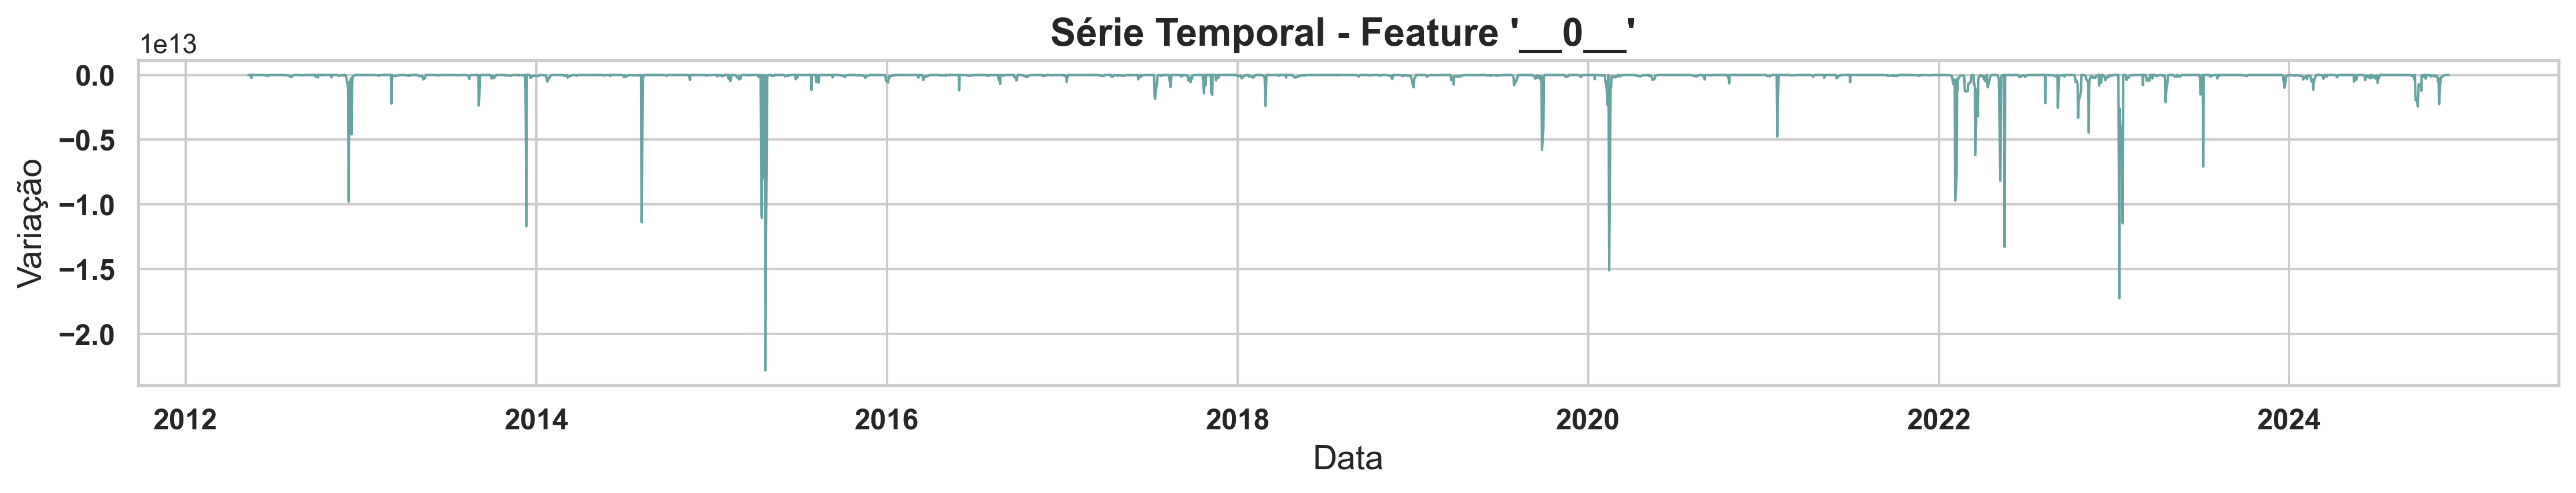

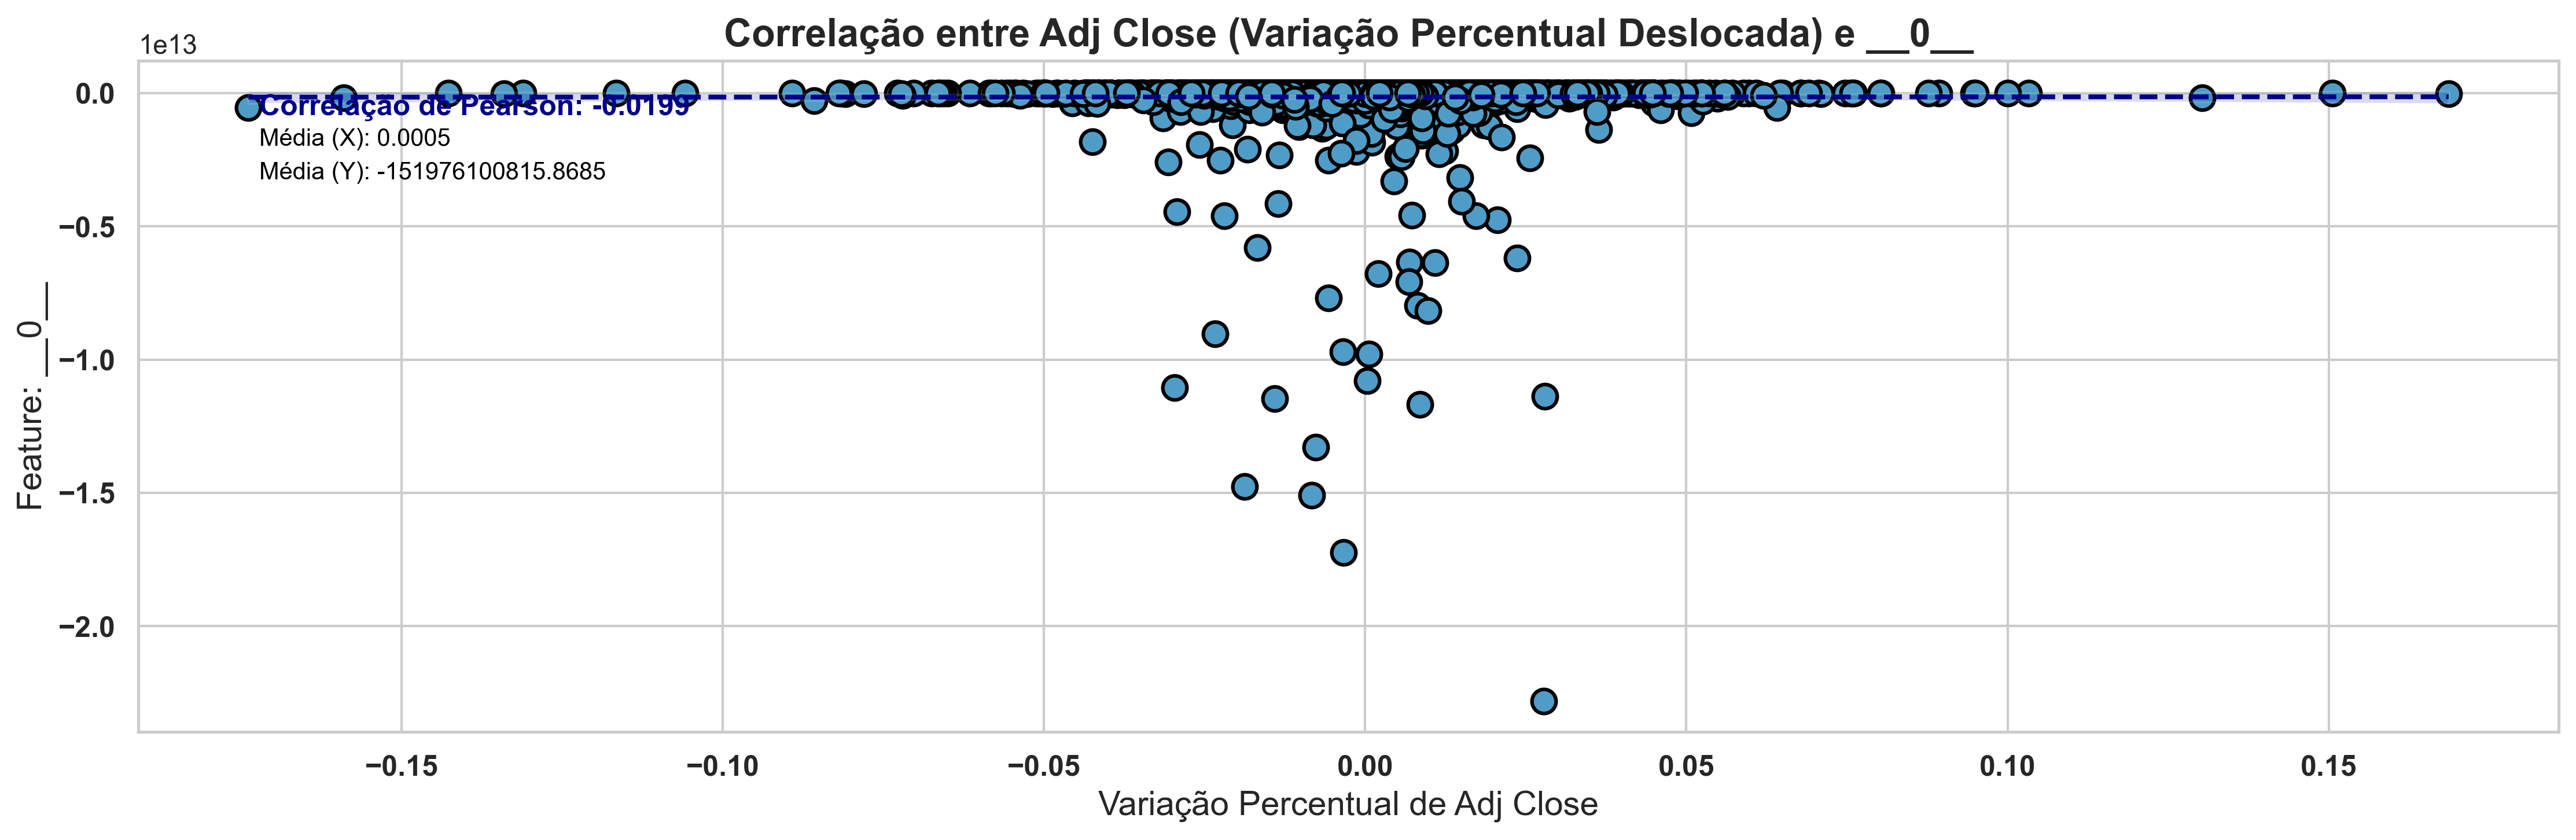

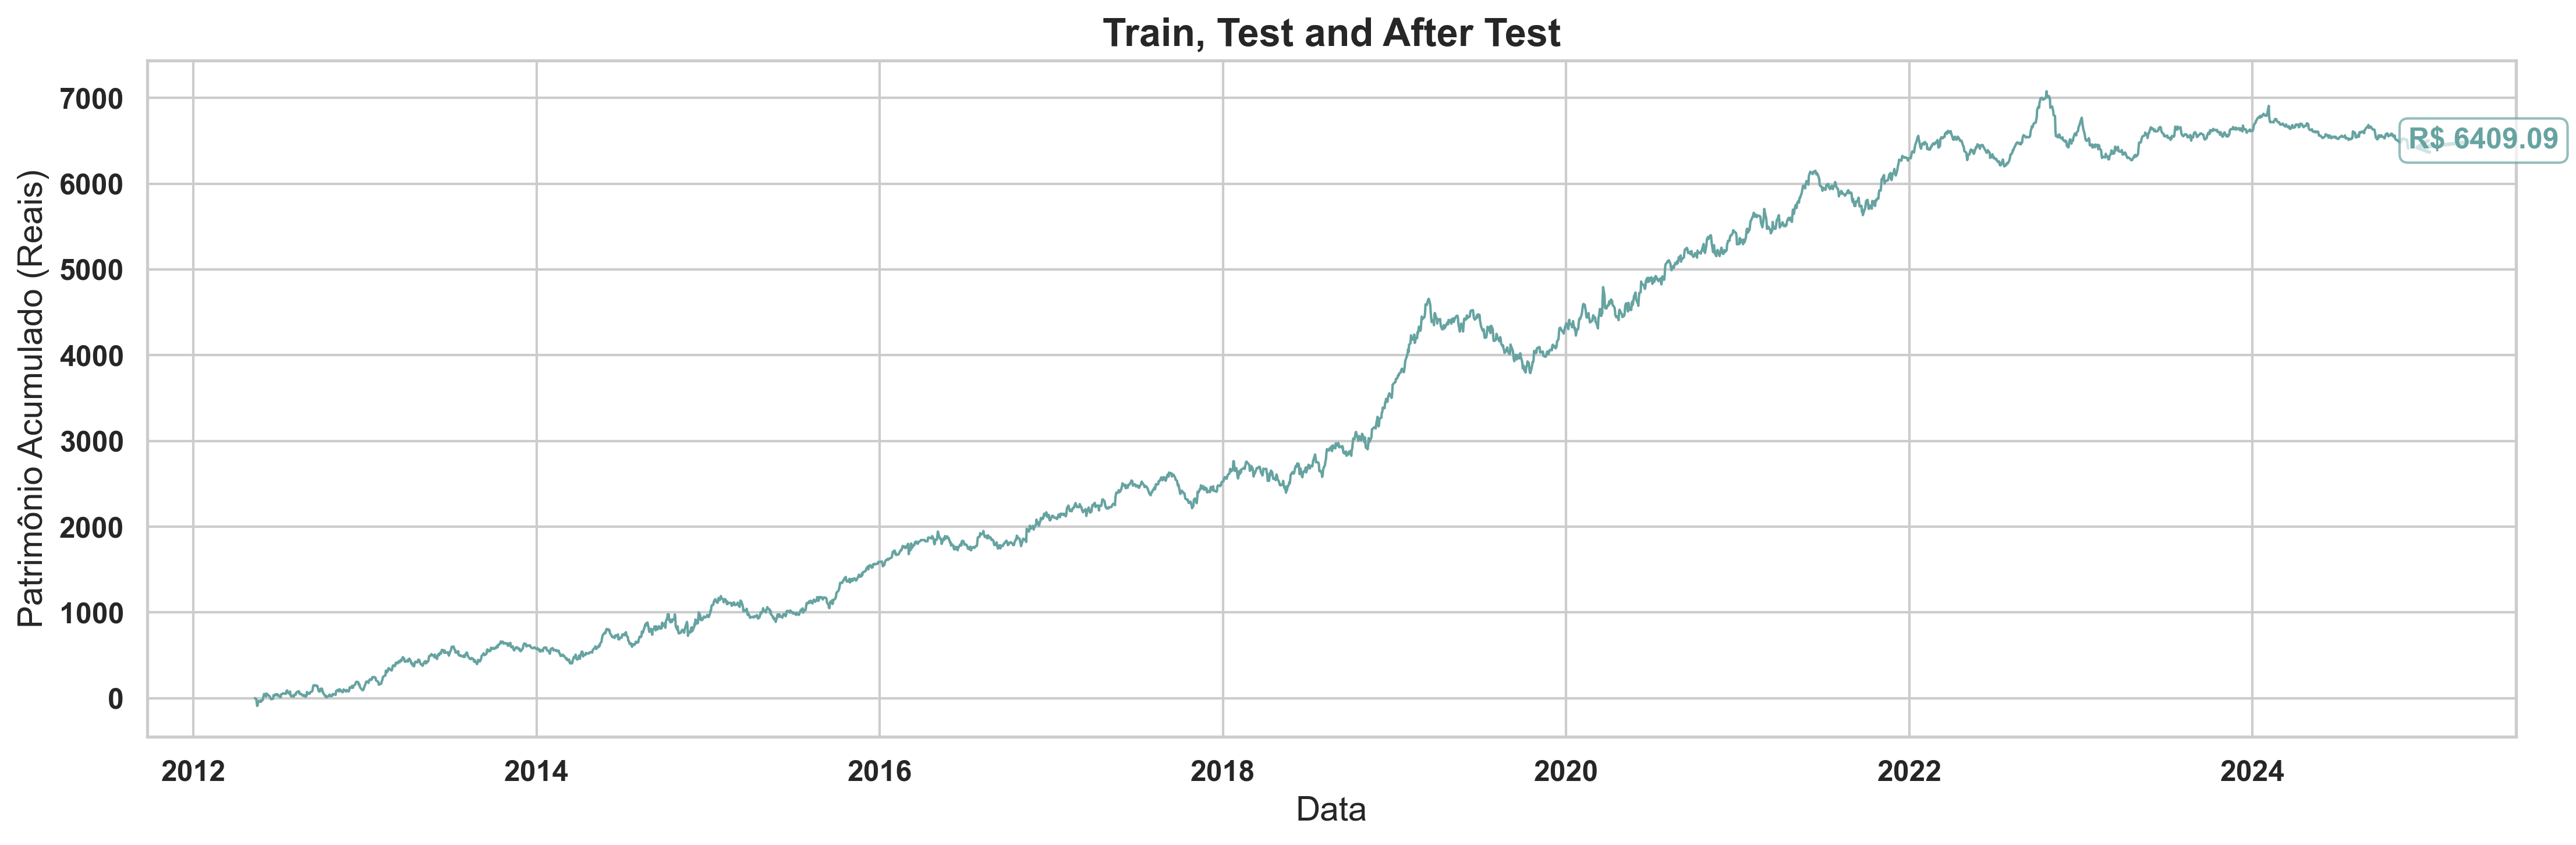

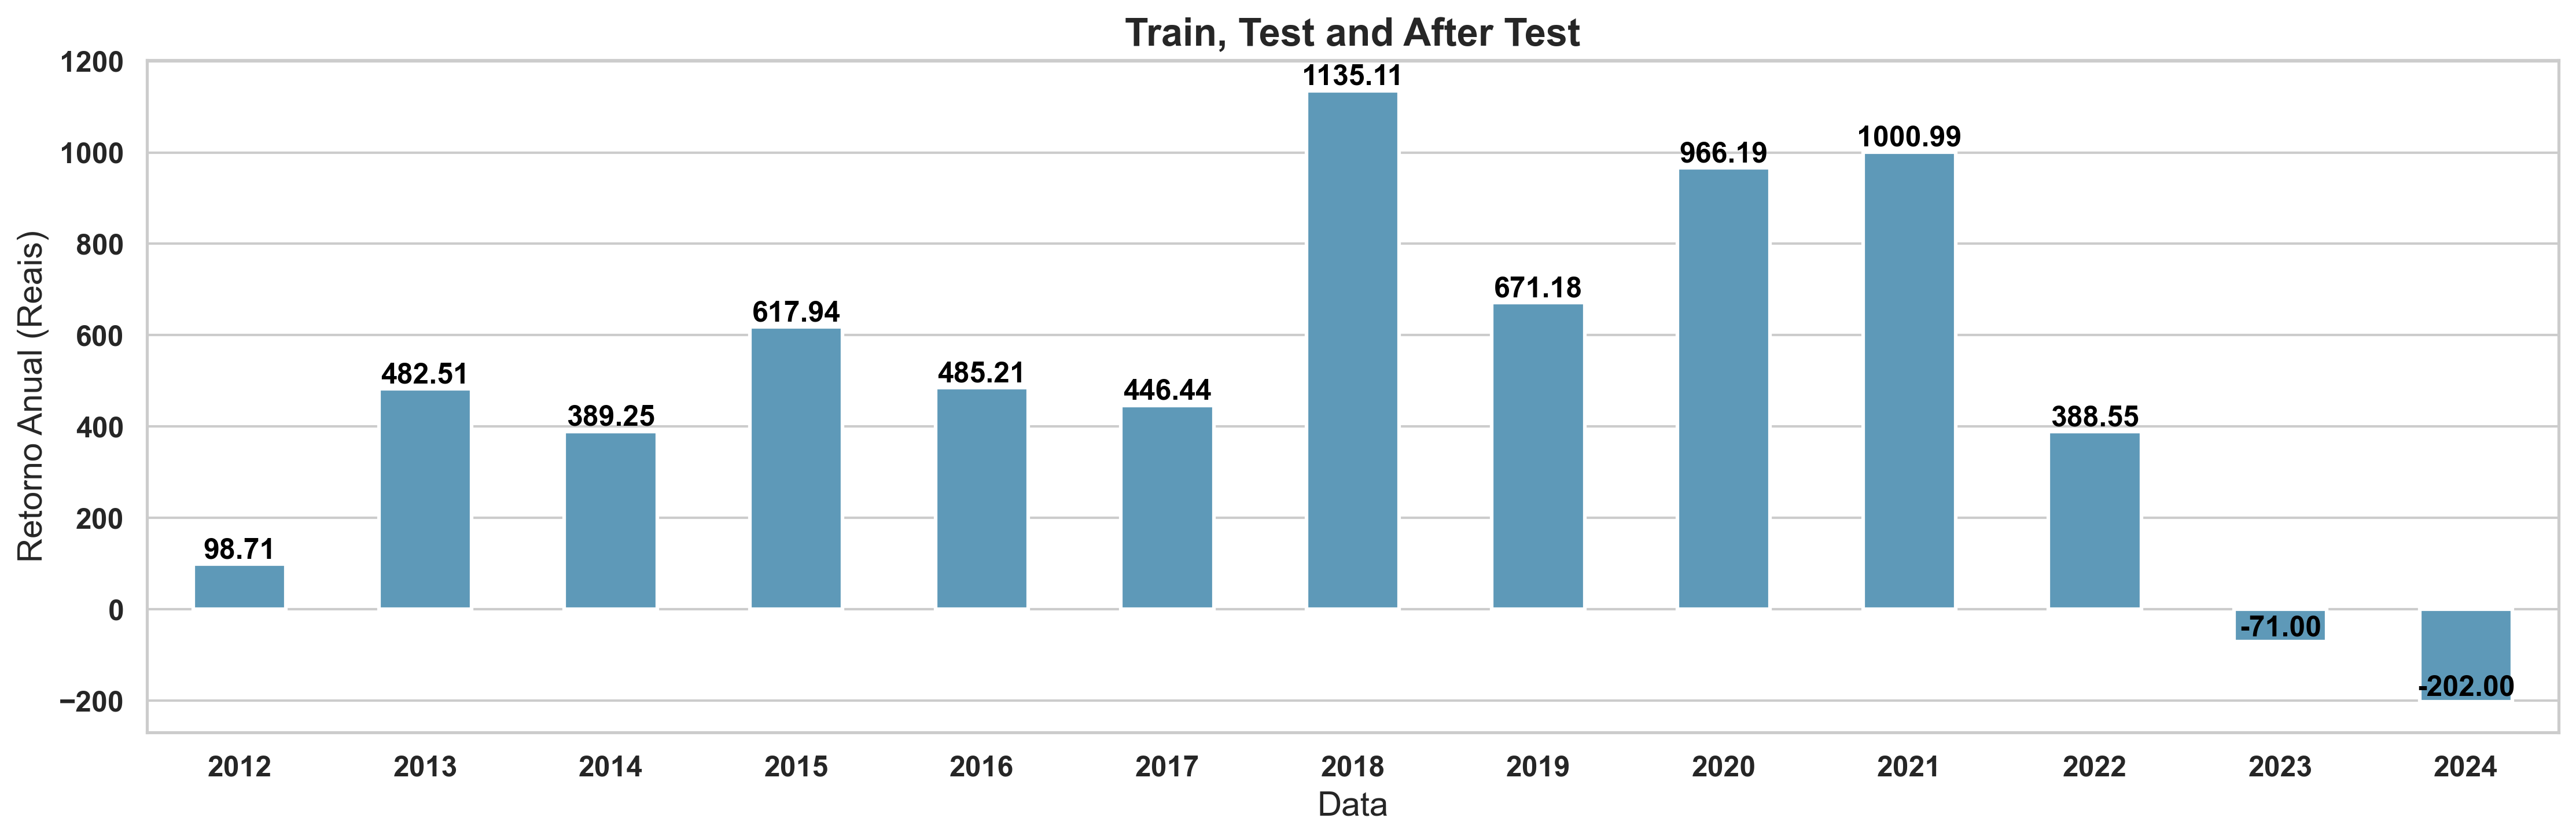

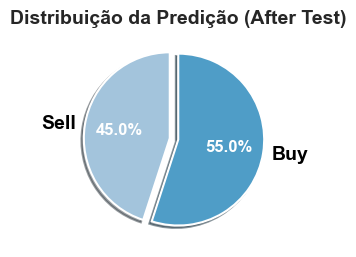

Qtd.dados:  3120


In [18]:
ot = False

for _ in range(1, 20):
    
    _ = _ + 2

    def __0__(df):
        # NOTE: ticker = BBDC4, start = '2012-05-11', end = '2022-05-11', p = 1
        volume = df['Volume']                                             
        adj_close = df['Adj Close'].pct_change(1)     
        close = df['Close'].pct_change(1)   
        open = df['Open'].pct_change(1)               
        low = df['Low'].pct_change(1)        
        high = df['High'].pct_change(1)       

        q = W(S(J(low, 6, 0.10) - J(high, 6, 0.10), 6), 6)
        w = volume / EARTH_RADIUS_KM / A(volume, 6) * W(U(high), 11)
        e = U(V(volume, 6)) * U(V(high, 6))                                    
        
        r = W(q, 4) / J(U(adj_close), 5, 0.75) 
        t = W(w, 16) / J(U(adj_close), 11, 0.75) 
        y = W(e, 16) / J(U(adj_close), 8, 0.75) 

        u = (1 + (r * volume).clip(upper=0)) - Q(adj_close, 5)

        return u
    
    mb = MarketBehaviorForecaster('BBDC4.SA', p=1, features=None, start='2012-05-11', end='2022-05-11', step_size=None, enable_debug=True,
                                  contracts=100).run_forecast(
        external_variable=lambda df: __0__(df))

    if ot is False:
        print_side_by_side(mb['metrics'], '')
        mb['graphs'](mb['df']['df'], f'__0__', (15, 3), 1, ylabel='Variação', title=f"Série Temporal - Feature '__0__' ").linha()
        mb['graphs'](mb['df']['df'], ['Adj Close', f'__0__'], (15, 5), p=1).correlacao()
        mb['graphs'](mb['df']['df'], 'resultado_predicao_acumulado', (15, 5), 1, ylabel='Patrimônio Acumulado (Reais)', title='Train, Test and After Test', seta=True).linha()
        mb['graphs'](mb['df']['df'], 'resultado_predicao_acumulado', (15, 5), 1, ylabel='Retorno Anual (Reais)', title='Train, Test and After Test').barplot()
        mb['graphs'](mb['df']['df'][['predicao']], 'predicao', (3, 3), xlabel='', title=f"Distribuição da Predição (After Test)", fontsize_title=14, tick_params_labelsize=2).pio()
        print('Qtd.dados: ', len((mb['df']['df'])))
        break
    else:
        print_side_by_side(mb['metrics'], _)
